In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_fraud.csv')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9.8   Legit  red  
3      9.8   Legit  red  
4      9.4   Legit  red

In [4]:
df['type'].unique()

array(['red', 'white'], dtype=object)

In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [7]:
df.shape

(6497, 13)

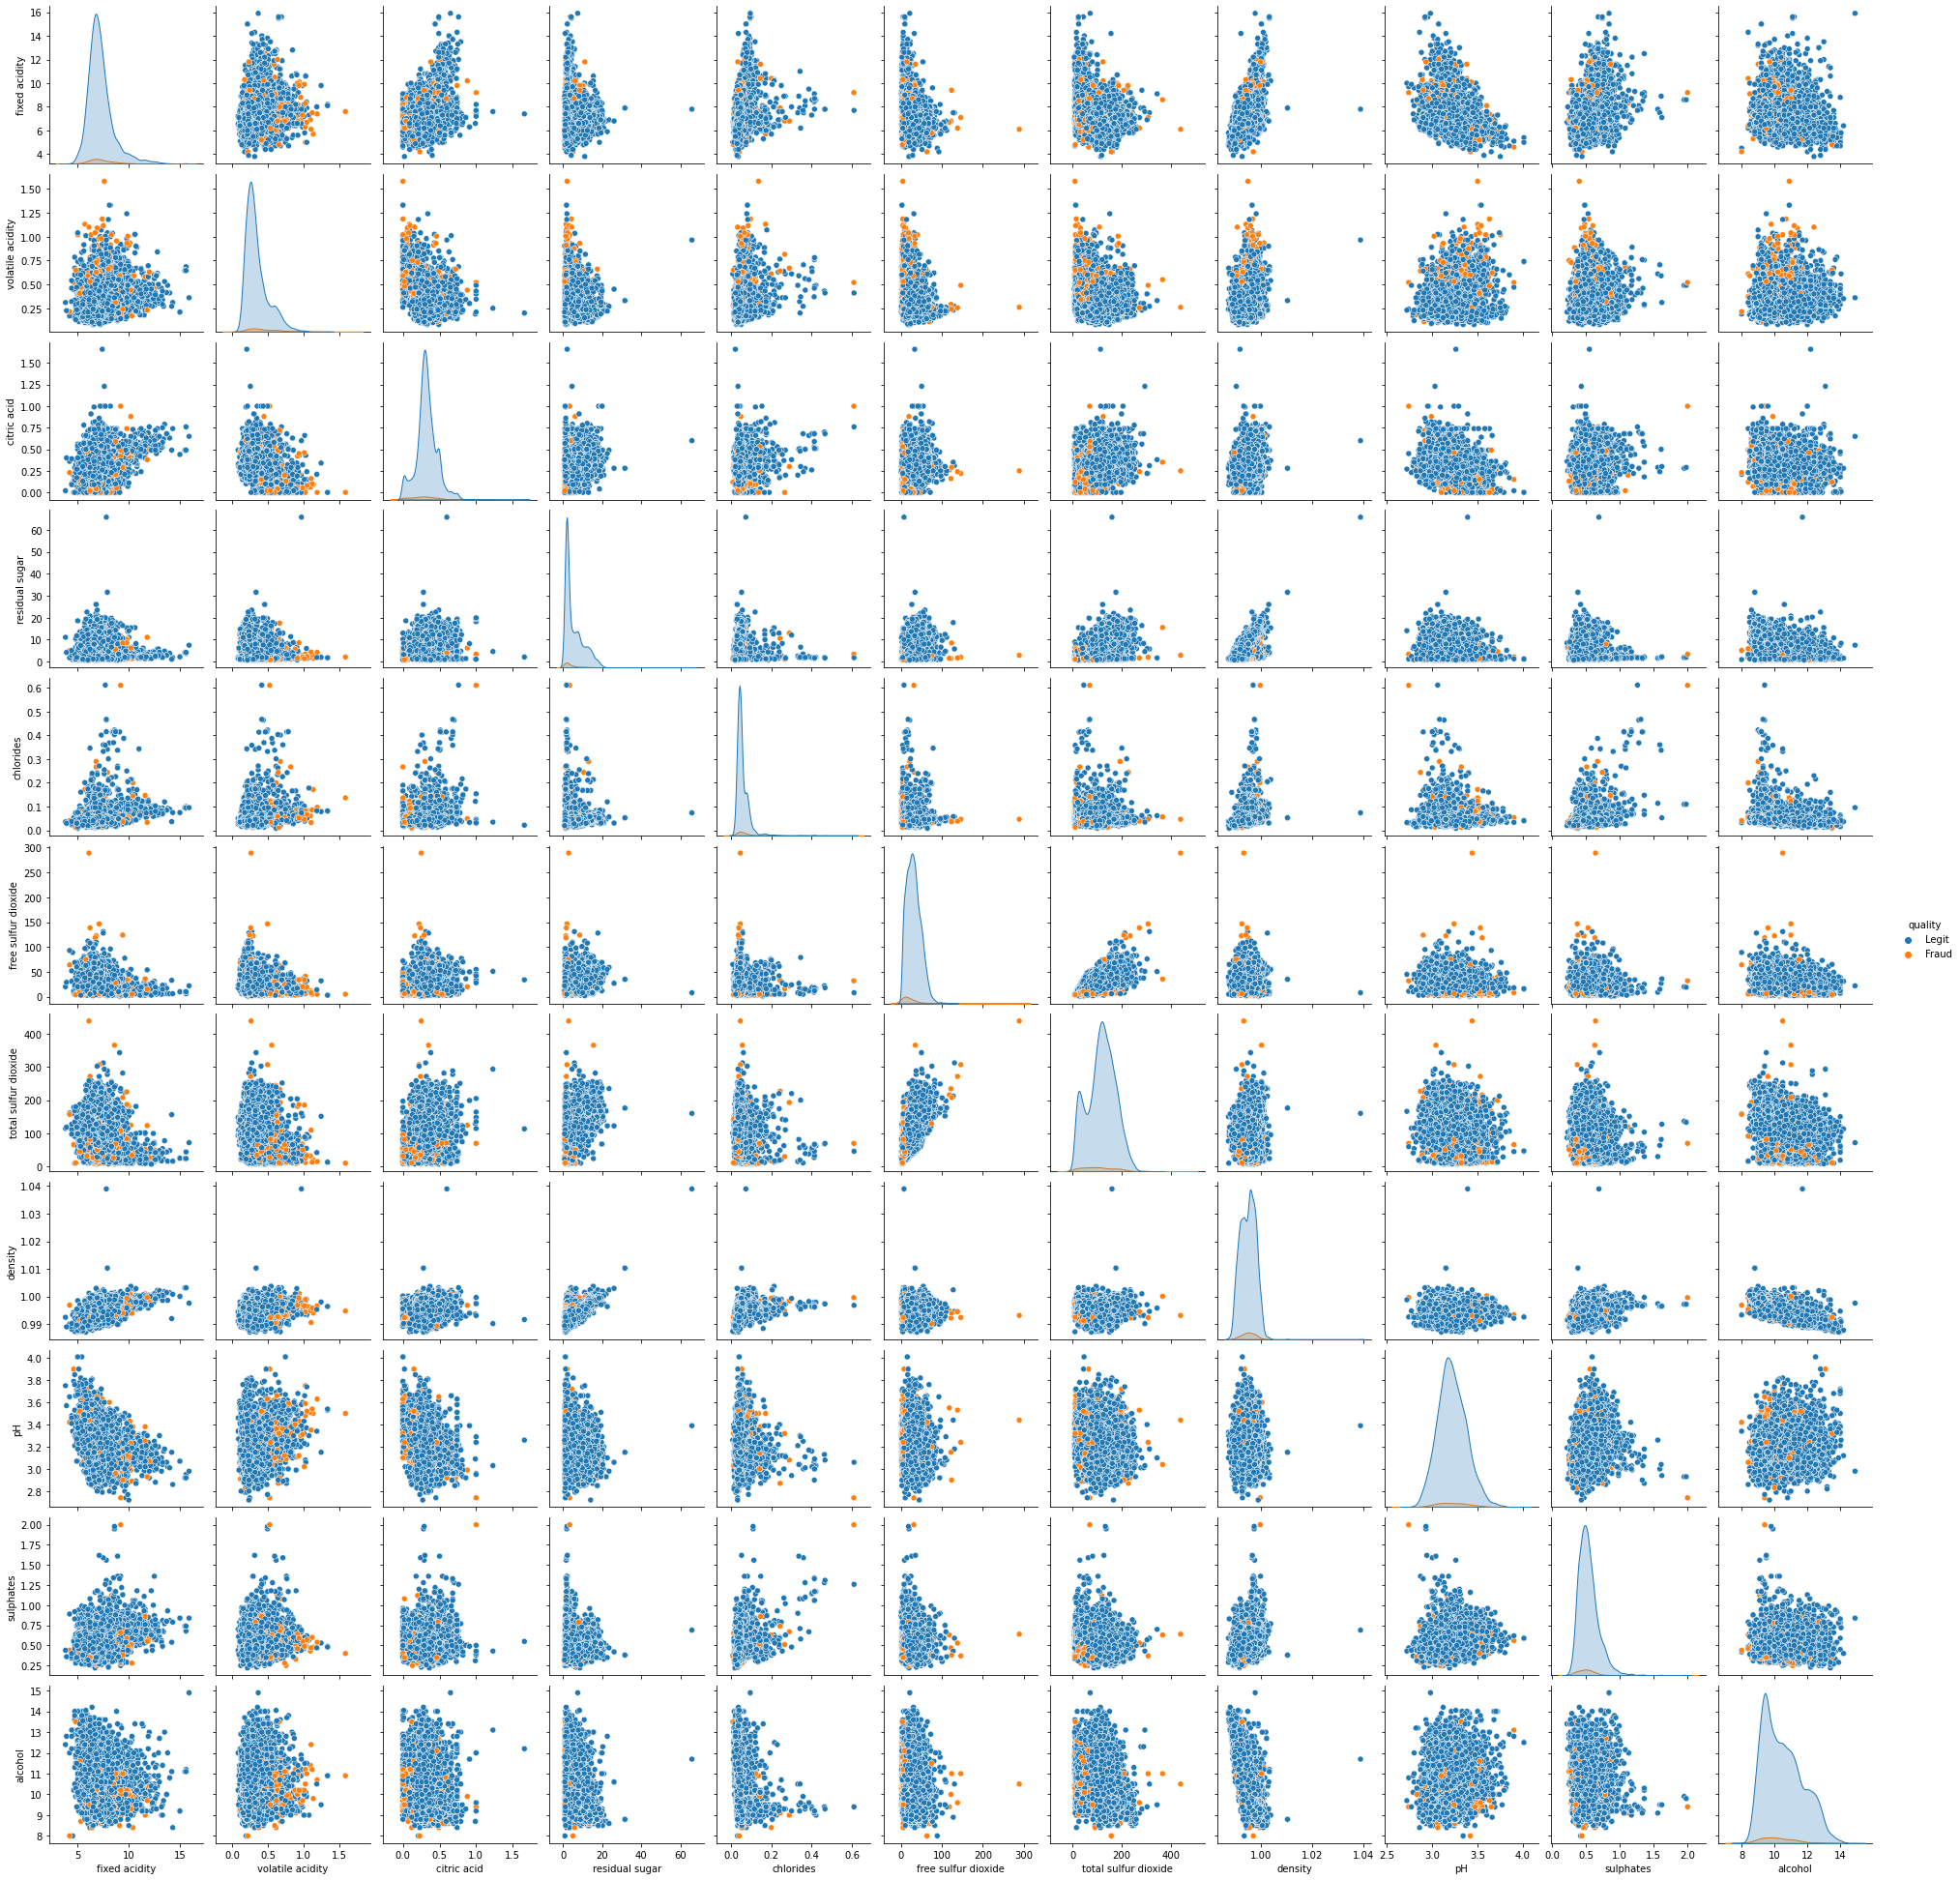

In [8]:
sns.pairplot(data=df,hue='quality')

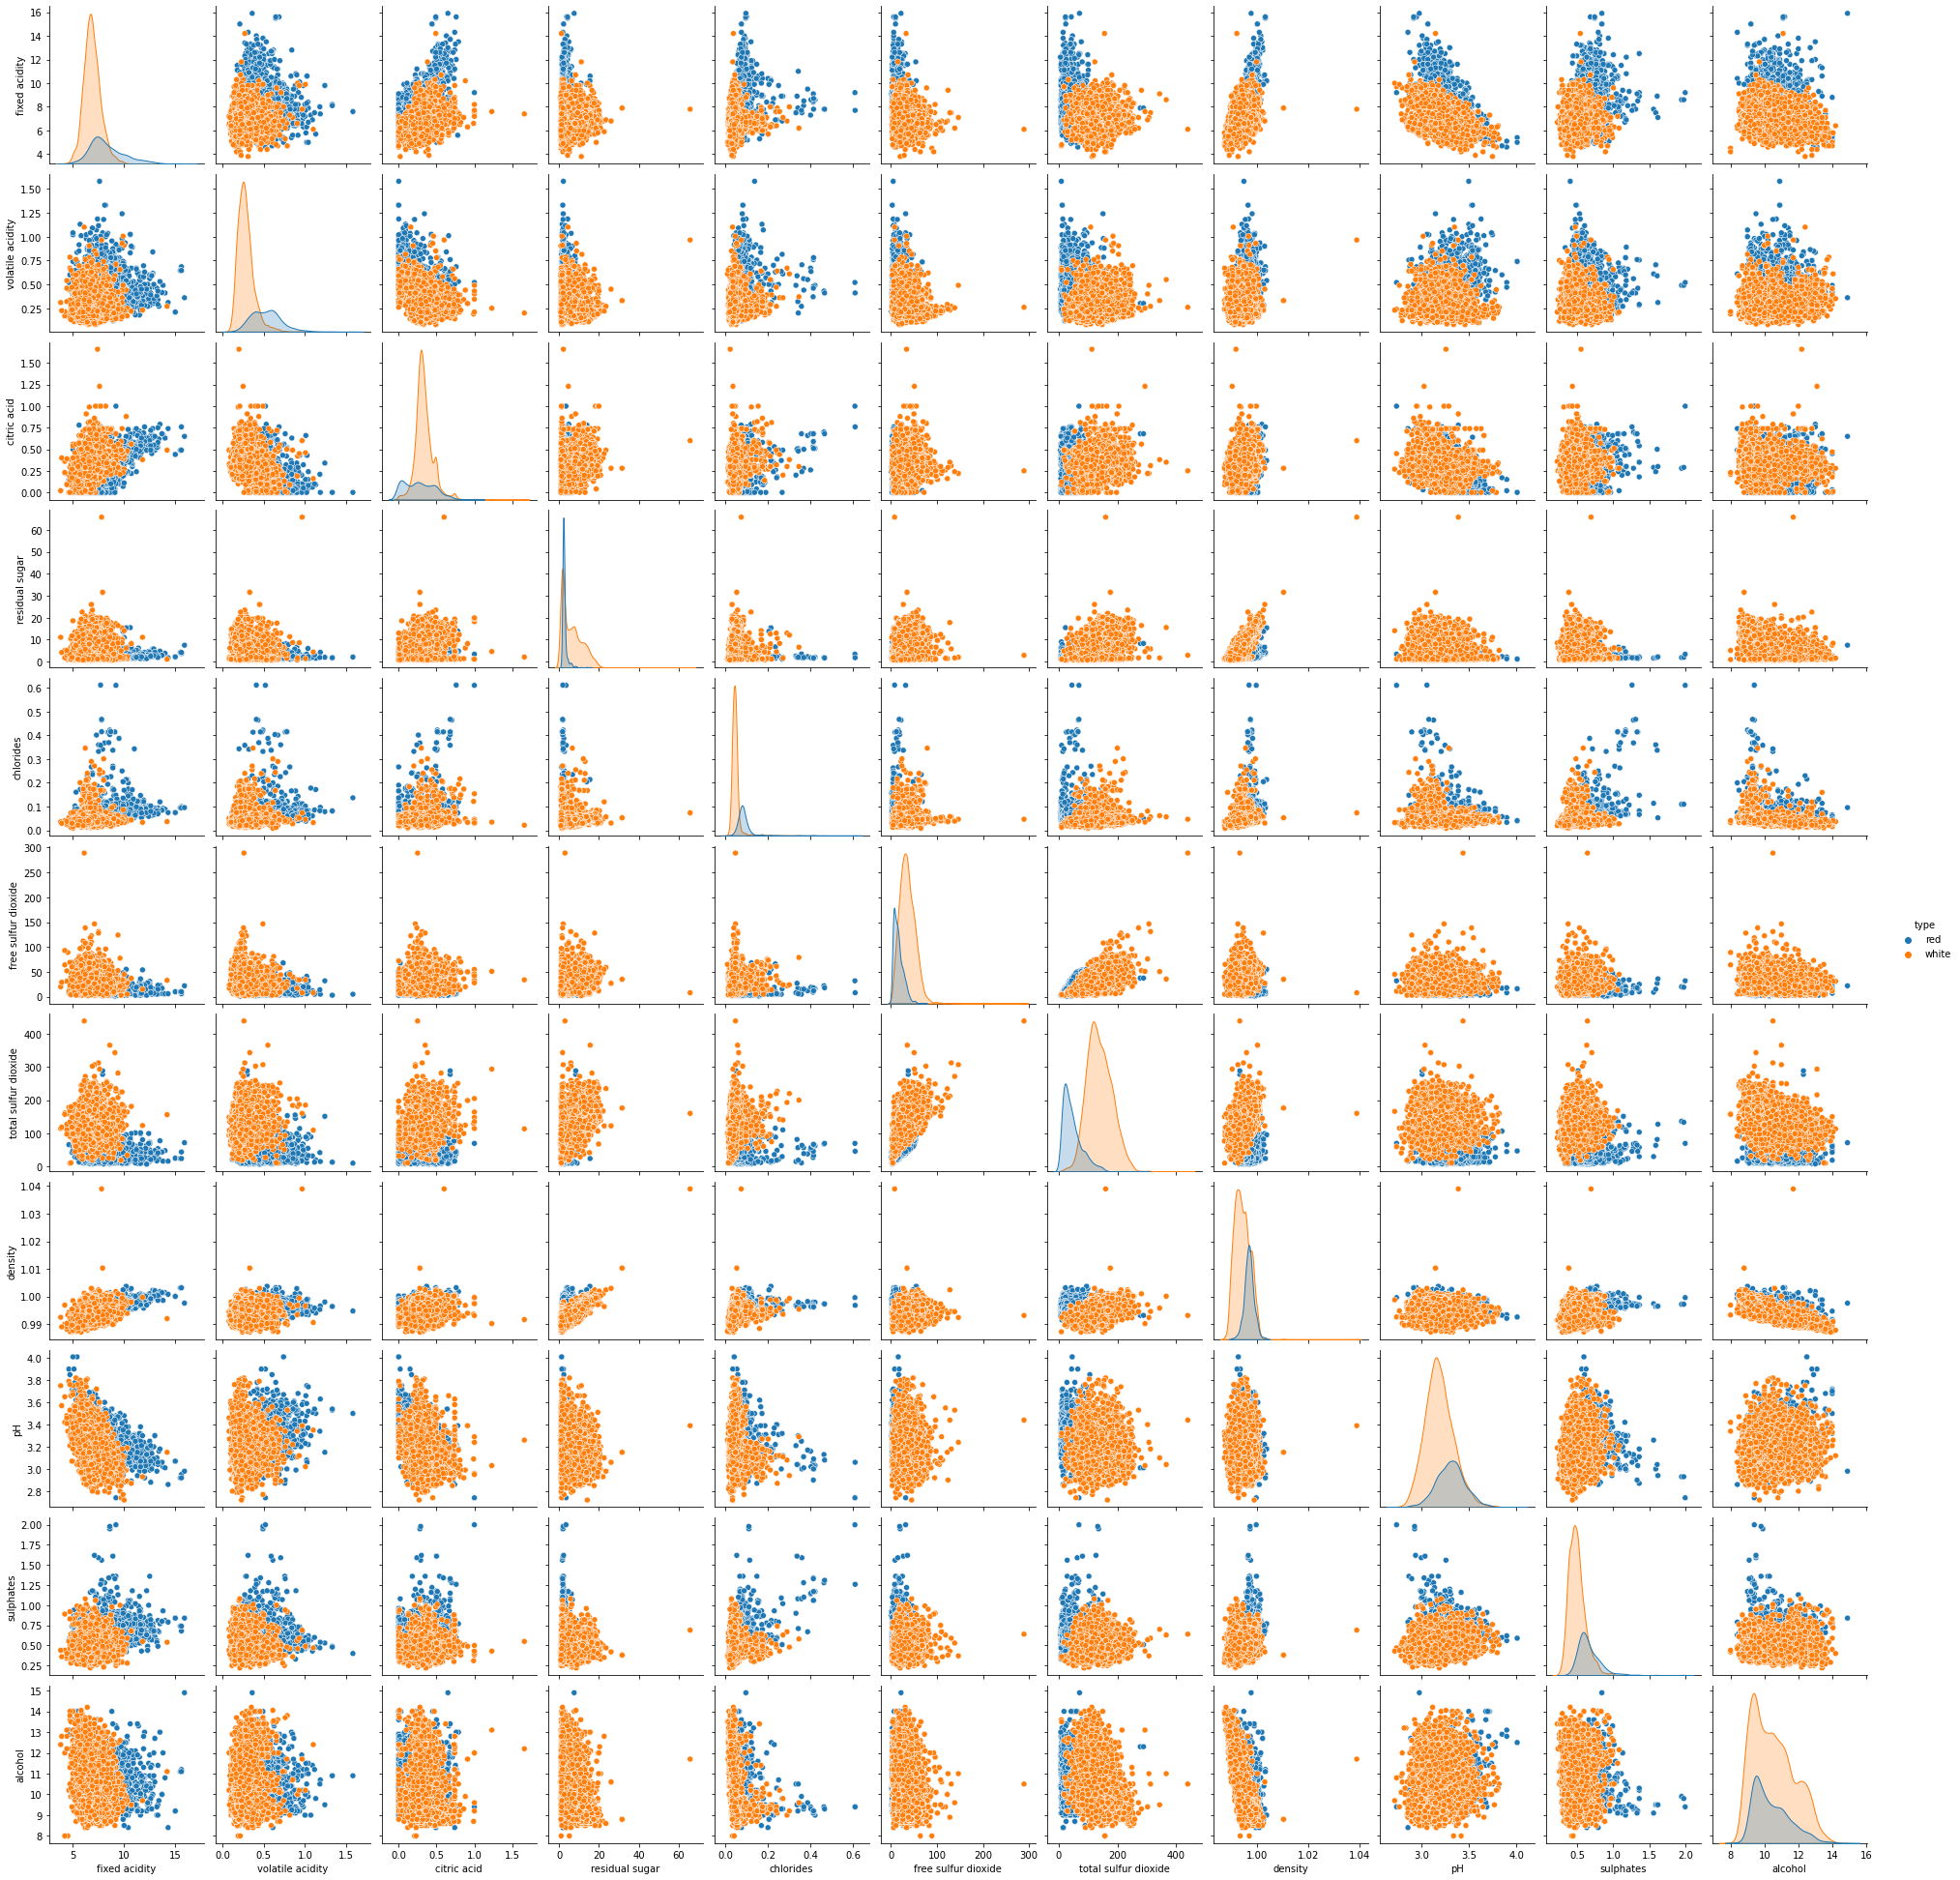

In [9]:
sns.pairplot(data=df,hue='type')

<AxesSubplot:>

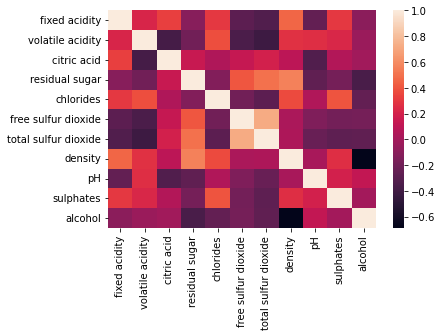

In [10]:
sns.heatmap(data=df.corr())

C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

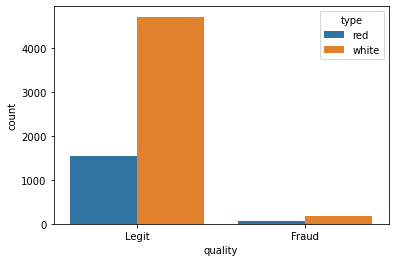

In [11]:
sns.countplot('quality',data=df,hue='type')

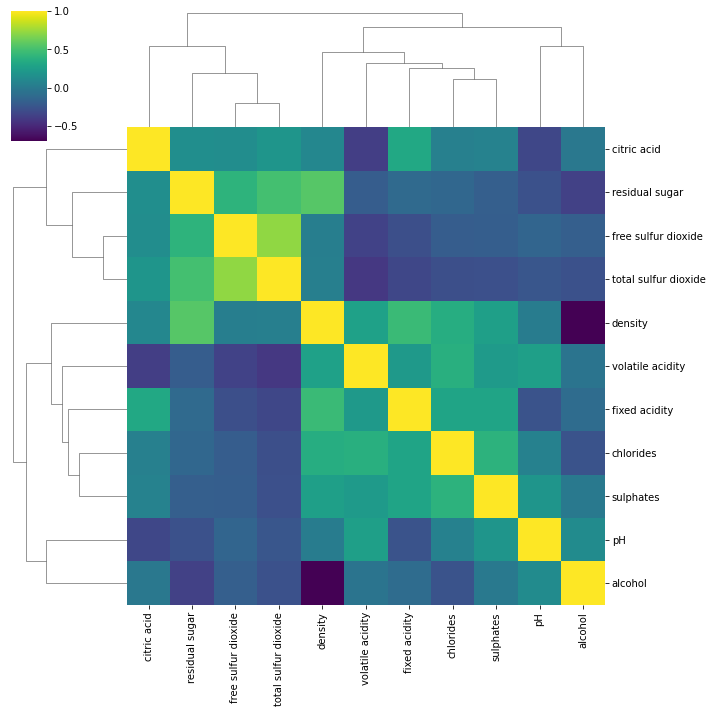

In [12]:
sns.clustermap(df.corr(),cmap='viridis')

In [13]:
df['quality'] = df['quality'].map({'Legit':1,'Fraud':0})

In [14]:
df['type'] = df['type'].map({'red':1,'white':0})

In [15]:
X = df.drop('quality',axis=1)

In [16]:
y = df['quality']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

In [24]:
scaler = StandardScaler()

In [25]:
svm = SVC(class_weight='balanced') #c,kernel,gamma

In [26]:
operations = [('scaler',scaler),('svm',svm)]

In [27]:
pipe = Pipeline(operations)

In [28]:
C = [0.001,0.01,0.1,0.5,1.0]
kernel = ['rbf','linear','poly','sigmoid']
gamma = ['auto','scaled']

In [29]:
param_grid = {'svm__C':C,'svm__kernel':kernel,'svm__gamma':gamma}

In [30]:
full_grid_classifier = GridSearchCV(pipe,param_grid)

In [31]:
full_grid_classifier.fit(X_train,y_train)

C:\Users\aarav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aarav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aarav\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\aarav\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it sh

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(class_weight='balanced'))]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'svm__gamma': ['auto', 'scaled'],
                         'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [32]:
full_grid_classifier.best_params_

{'svm__C': 0.001, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}

In [33]:
y_pred = full_grid_classifier.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.26      0.29        27
           1       0.97      0.98      0.97       623

    accuracy                           0.95       650
   macro avg       0.64      0.62      0.63       650
weighted avg       0.94      0.95      0.94       650



C:\Users\aarav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


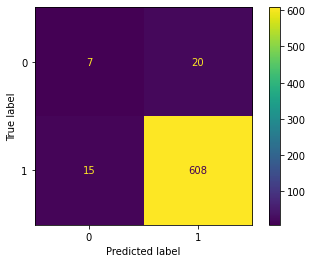

In [35]:
plot_confusion_matrix(full_grid_classifier,X_test,y_test)